#***HEART DISEASE PREDICTION PROJECT***

---



heart data collection -> data pre-processing -> Train Test split ->Training model

new data->trained model->person is healthy or has heart defect


#IMPORTING THE DEPENDENCIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import VotingClassifier

#DATA COLLECTION AND PROCESSING

In [ ]:
#loading the csv data to pandas dataframe
heart_data=pd.read_csv('/content/heart.csv')

In [ ]:
#printing first five rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#printing last five rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
#number of rows and columns in the dataset
heart_data.shape

(1025, 14)

In [ ]:
#getting info about the heart dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#statistical measures of the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#checking the distribution of target variable
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

1-->Defective Heart

0-->Healthy Heart

splitting the features and target

In [ ]:
X=heart_data.drop(columns='target',axis=1)
Y=heart_data['target']

In [ ]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


#TRAIN TEST SPLIT

splitting the data into training data and testing data

In [ ]:
 #splitting the data into train and test data
 X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
#checking the number of training data and test data we have
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(1025, 13) (820, 13) (205, 13)
(1025,) (820,) (205,)


#NORMALIZATION/STANDARDIZATION

improves model performance

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#LOGISTIC REGRESSION MODEL

In [ ]:
#Initializing the model
LR_model=LogisticRegression()

#training the LogisticRegression with Training Data
LR_model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#XG BOOST MODEL

In [ ]:
#Initializing the model
XGB_model=XGBClassifier()
#training the LogisticRegression with Training Data
XGB_model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#RANDOM FOREST MODEL

In [ ]:
#Initializing the model
RF_model=RandomForestClassifier()
#training the LogisticRegression with Training Data
RF_model.fit(X_train,Y_train)

RandomForestClassifier()

#SUPPORT VECTOR MODEL

In [ ]:
#Initializing the model
SVM_model=SVC()
#training the LogisticRegression with Training Data
SVM_model.fit(X_train,Y_train)

SVC()

#MODEL EVALUATION

accuracy score

In [ ]:
#accuracy on training data
X_train_prediction_LR=LR_model.predict(X_train)
X_train_prediction_XGB=XGB_model.predict(X_train)
X_train_prediction_RF=RF_model.predict(X_train)
X_train_prediction_SVM=SVM_model.predict(X_train)
training_data_accuracy_LR=accuracy_score(X_train_prediction_LR,Y_train)
training_data_accuracy_XGB=accuracy_score(X_train_prediction_XGB,Y_train)
training_data_accuracy_RF=accuracy_score(X_train_prediction_RF,Y_train)
training_data_accuracy_SVM=accuracy_score(X_train_prediction_SVM,Y_train)

In [ ]:
#accuracy on test data
X_test_prediction_LR=LR_model.predict(X_test)
X_test_prediction_XGB=XGB_model.predict(X_test)
X_test_prediction_RF=RF_model.predict(X_test)
X_test_prediction_SVM=SVM_model.predict(X_test)
test_data_accuracy_LR=accuracy_score(X_test_prediction_LR,Y_test)
test_data_accuracy_XGB=accuracy_score(X_test_prediction_XGB,Y_test)
test_data_accuracy_RF=accuracy_score(X_test_prediction_RF,Y_test)
test_data_accuracy_SVM=accuracy_score(X_test_prediction_SVM,Y_test)

In [ ]:
print('Accuracy on Training Data using logistic regression model : ',training_data_accuracy_LR)
print('Accuracy on Training Data using XGBoost model : ',training_data_accuracy_XGB)
print('Accuracy on Training Data using Random Forest model : ',training_data_accuracy_RF)
print('Accuracy on Training Data Support vector machine model : ',training_data_accuracy_SVM)

Accuracy on Training Data using logistic regression model :  0.8524390243902439
Accuracy on Training Data using XGBoost model :  1.0
Accuracy on Training Data using Random Forest model :  1.0
Accuracy on Training Data Support vector machine model :  0.7207317073170731


In [ ]:
print('Accuracy on Test Data using logistic regression model : ',test_data_accuracy_LR)
print('Accuracy on Test Data using XGBoost model : ',test_data_accuracy_XGB)
print('Accuracy on Test Data using Random Forest model : ',test_data_accuracy_RF)
print('Accuracy on Test Data using Support vector machine model : ',test_data_accuracy_SVM)

Accuracy on Test Data using logistic regression model :  0.8048780487804879
Accuracy on Test Data using XGBoost model :  1.0
Accuracy on Test Data using Random Forest model :  1.0
Accuracy on Test Data using Support vector machine model :  0.7073170731707317


#ENSEMBLE METHOD

Combine predictions from multiple models using ensemble techniques like Voting Classifier

In [ ]:
ensemble_model = VotingClassifier(estimators=[('lr', LR_model), ('rf', RF_model), ('svc', SVM_model), ('xgb', XGB_model)], voting='hard')
ensemble_model.fit(X_train, Y_train)
print('Ensemble Model Accuracy:', ensemble_model.score(X_test, Y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Model Accuracy: 0.975609756097561


#CORRELATION MATRIX


creating a heatmap to visualize the correlation between different features


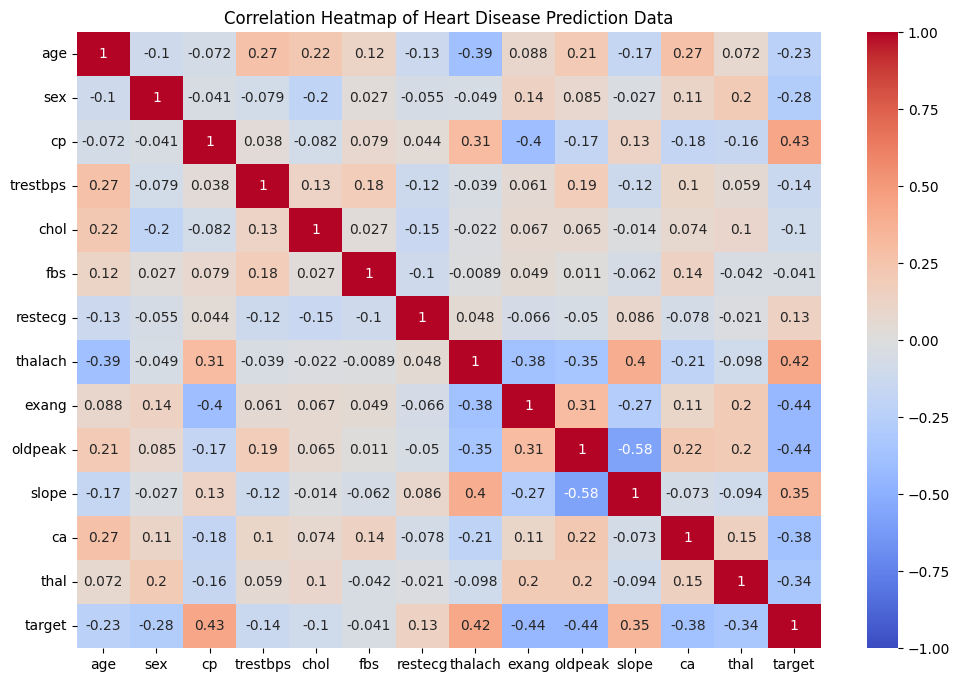

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(heart_data.corr(),annot=True,cmap='coolwarm',vmin=-1, vmax=1, annot_kws={"size": 10})
plt.title('Correlation Heatmap of Heart Disease Prediction Data')
plt.show()

#PAIRLPLOT

seaborn's pairplot to see relationships between pairs of features and the distribution of these features.


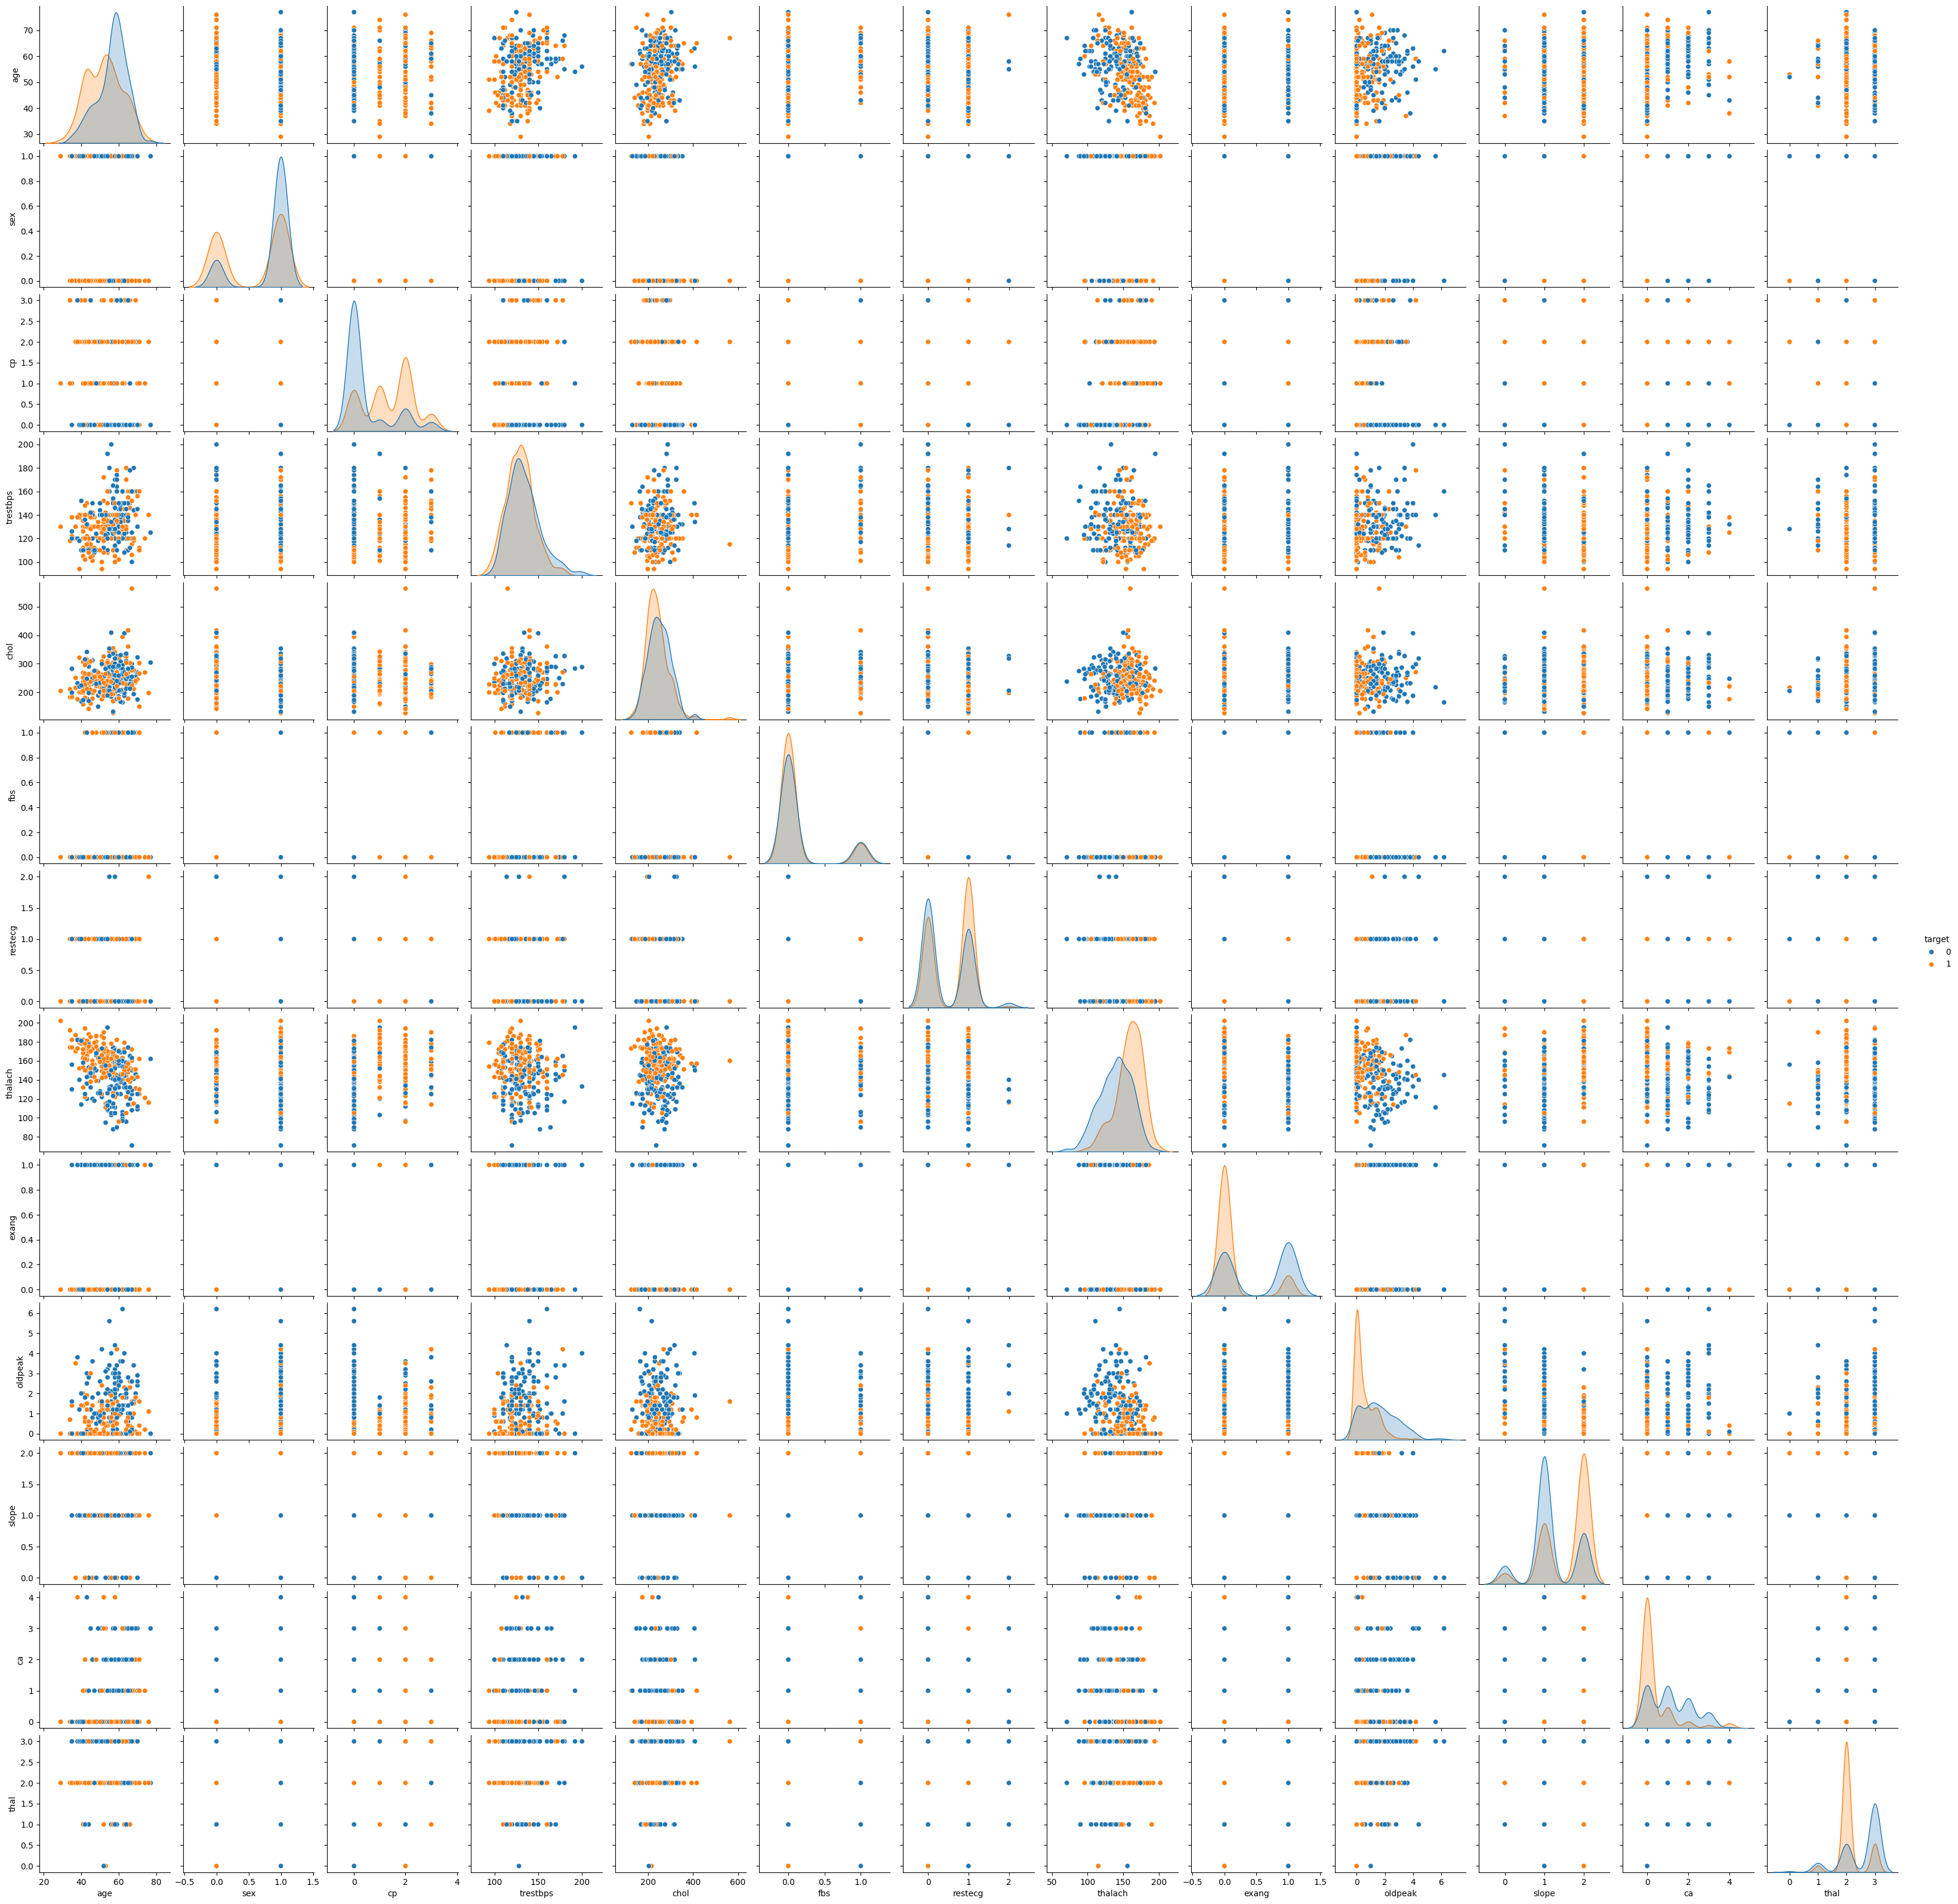

In [ ]:
sns.pairplot(heart_data,hue='target')
plt.show()

#CROSS-VALIDATION

cross-validation to evaluate the model more robustly.

In [ ]:
scores = cross_val_score(ensemble_model, X_scaled, Y, cv=10)
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())

Cross-validation scores: [0.97087379 1.         0.99029126 0.99029126 0.97087379 1.
 0.98039216 0.99019608 0.94117647 0.92156863]
Mean cross-validation score: 0.9755663430420712


#CONFUSION MATRIX AND CLASSIFICATION REPORT

confusion matrix and classification report to get a detailed performance analysis.

In [ ]:
Y_test_pred = ensemble_model.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(Y_test, Y_test_pred))
print('Classification Report')
print(classification_report(Y_test, Y_test_pred))

Confusion Matrix
[[100   0]
 [  5 100]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       100
           1       1.00      0.95      0.98       105

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



#PREDICTIVE SYSTEM

building predictive system

In [ ]:
#taking the input data for prediction
input_data=(71,0,0,112,149,0,1,125,0,1.6,1,0,2)
#converting the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshaping the numpy array as predicting the result only for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#to predict the result for input data
prediction=ensemble_model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
    print("The person doesn't have heart disease.")

else:
    print("The person has heart disease")


[1]
The person has heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


taking user input

In [ ]:
age=int(input('Enter your age: '))
gender=int(input('Enter your gender(1 for male,0 for female): '))
chest_pain_type=int(input('Enter chest pain type(0,1,2,3): '))
resting_blood_pressure=int(input('Enter resting blood pressure: '))
serum_cholestrol=int(input('Enter serum cholestrol in mg/dl: '))
fasting_blood_sugar=int(input('Enter fasting blood sugar: '))
resting_electrocardiographic_results=int(input('Enter resting electrocardiographic results(values:0,1,2): '))
max_heart_rate_achieved=int(input('Enter maximum heart rate achieved: '))
exercise_induced_angina=int(input('Enter exercise induced angina: '))
oldpeak=float(input('Enter oldpeak=ST depression induced by exercise relative to rest: '))
slope=int(input('Enter the slope of the peak exercise ST segment: '))
number_of_major_vessels=int(input('Enter number of major vessels (0-3) colored by flourosopy: '))
thal=int(input('Enter thal: 0 = normal; 1 = fixed defect; 2 = reversable defect: '))


input_data_user=(age,gender,chest_pain_type,resting_blood_pressure,serum_cholestrol,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal)
input_data_as_numpy_array=np.asarray(input_data_user)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=ensemble_model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
    print("The person doesn't have heart disease.")

else:
    print("The person has heart disease")


Enter your age: 45
Enter your gender(1 for male,0 for female): 1
Enter chest pain type(0,1,2,3): 0
Enter resting blood pressure: 104
Enter serum cholestrol in mg/dl: 208
Enter fasting blood sugar: 0
Enter resting electrocardiographic results(values:0,1,2): 0
Enter maximum heart rate achieved: 148
Enter exercise induced angina: 1
Enter oldpeak=ST depression induced by exercise relative to rest: 3
Enter the slope of the peak exercise ST segment: 1
Enter number of major vessels (0-3) colored by flourosopy: 0
Enter thal: 0 = normal; 1 = fixed defect; 2 = reversable defect: 2
[1]
The person has heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


#SAVING THE MODEL

In [ ]:
import joblib

joblib.dump(ensemble_model, 'ensemble_model.pkl')


['ensemble_model.pkl']

In [ ]:
from google.colab import files
files.download('ensemble_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>